<a href="https://colab.research.google.com/github/saidul-mondal-au7/netflix_movies_show_tv_shows/blob/master/Netflix_movies_%26_tv_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name** - Saidul Mondal


# **Project Summary**

This project involves analyzing the content released on Netflix, the world's largest on-demand internet streaming media and online DVD movie rental service provider. The dataset consists of TV shows and movies available on Netflix as of 2019 and is collected from Fixable, a third-party Netflix search engine.

The aim of this project is to categorize and cluster Netflix movies/shows according to their attributes such as genre, cast, director, rating, country, and description. This will enable the identification of groups of people who share similar preferences. The dataset consisted of 7787 records and 11 attributes. The project began with data cleaning and exploratory data analysis (EDA).

The attributes were tokenized, preprocessed, and vectorized using the TFIDF vectorizer. Principal Component Analysis (PCA) was used to handle the curse of dimensionality. Two types of clusters were created using the K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, and the optimal number of clusters was determined using different techniques such as elbow method, silhouette score, and dendogram.

Finally, a content-based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system recommends 10 shows/movies to the user based on the type of show they watched. Overall, the project provides insights into the Netflix dataset and helps users find similar shows/movies based on their preferences.

# **GitHub Link -**

https://github.com/saidul-mondal-au7/netflix_movies_show_tv_shows

# **Problem Statement**


**The problem statement of this project is to explore and analyze the Netflix dataset to identify patterns and similarities among TV shows and movies. The goal is to cluster the content into groups of similar shows and movies using attributes such as director, cast, country, genre, rating, and description. Additionally, the project aims to integrate external datasets like IMDB ratings and Rotten Tomatoes to provide insights into the content's quality and popularity. The ultimate objective is to build a content-based recommendation system that provides personalized recommendations to users based on their viewing behavior and preferences, ultimately enhancing the user experience on the Netflix platform.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [32]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
path = "/content/drive/MyDrive/netflix_movies_&_tv_shows/"
raw_data = pd.read_csv(path + "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")


### Dataset First View

In [6]:
# Dataset First Look
df = raw_data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 7787 
 Number of columns 12


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0
6,type,0
7,title,0
8,release_year,0
9,duration,0


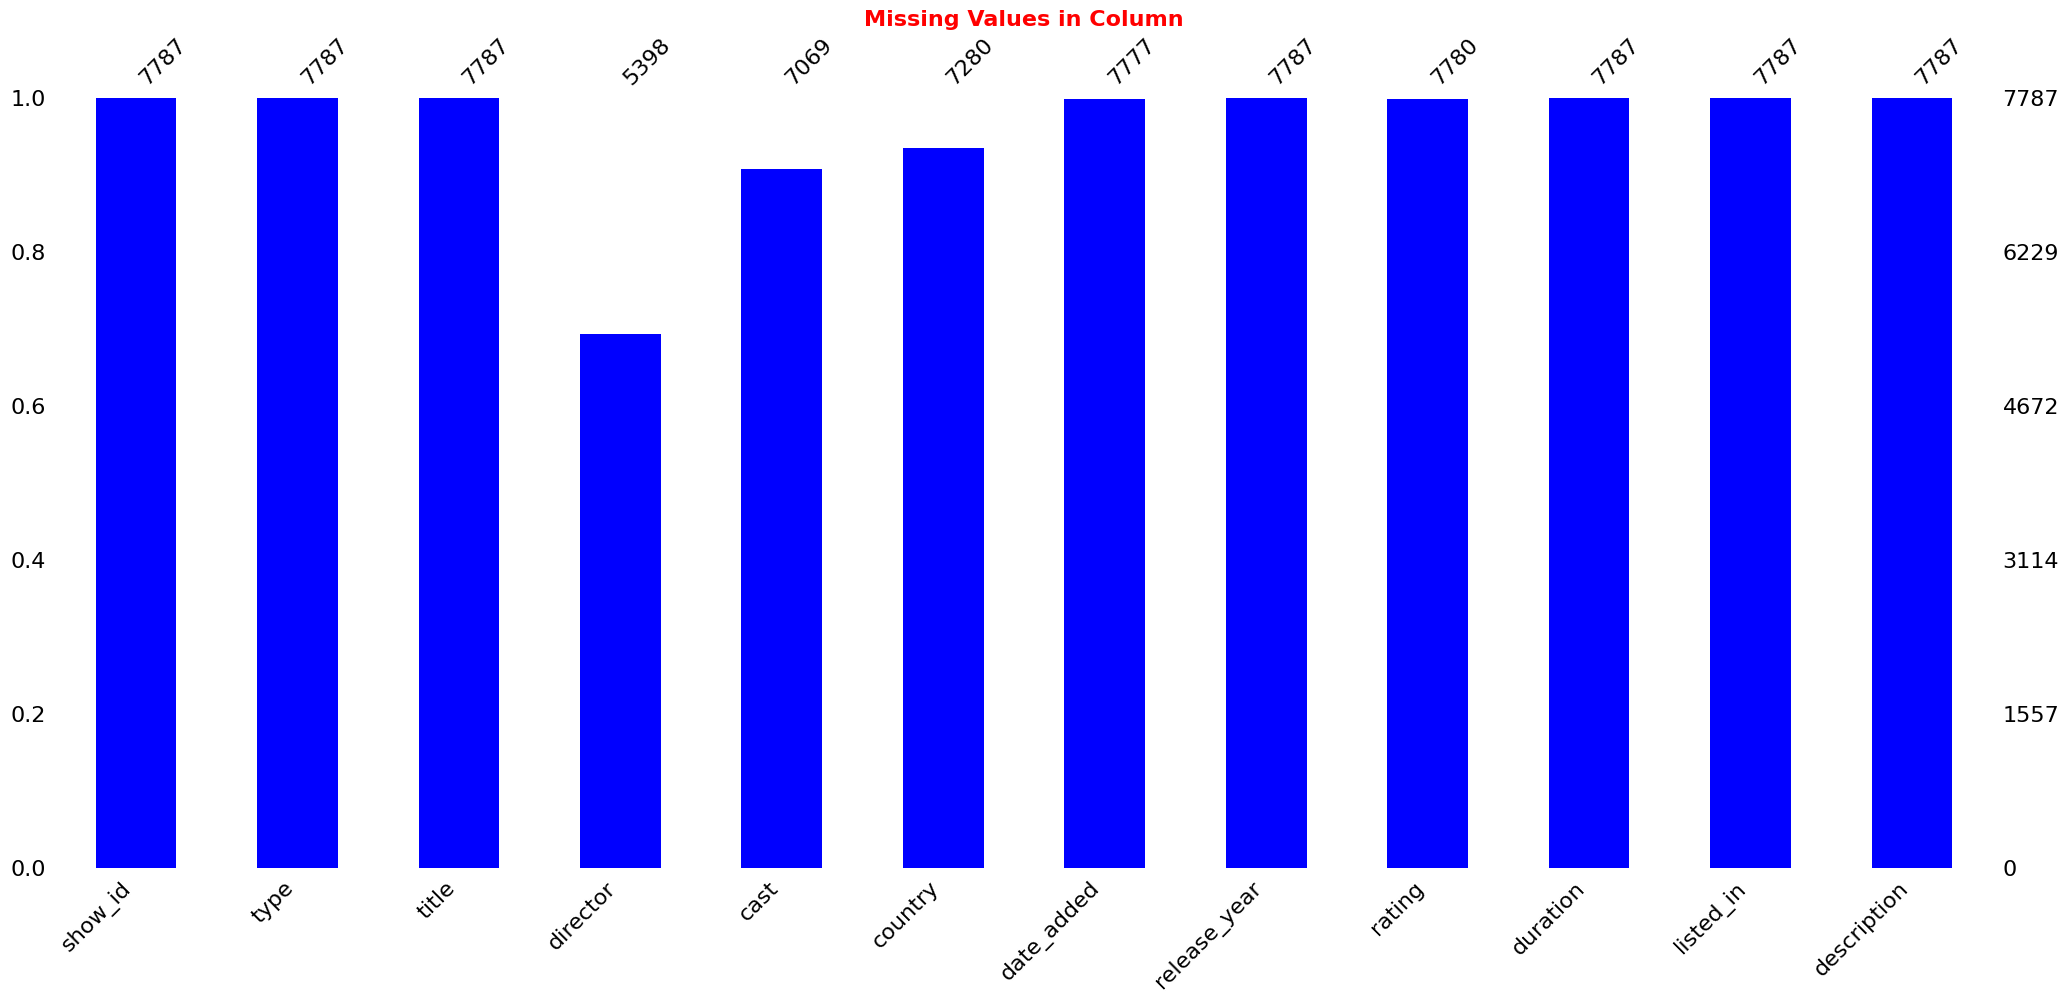

In [11]:
# Visualizing the missing values
plt.figure(figsize=(14, 5),dpi=100)
msno.bar(df, color = 'blue')
plt.title("Missing Values in Column",fontweight="bold",size=16,color='red')
plt.show()

### What did you know about your dataset?

* The dataset contains information about specific movies.
* There are NaN values present in the director, cast, country, date_added, and rating columns.
* It is not possible to impute missing values using any method, as the data is specific to each movie.
* To avoid losing any data, the decision has been made to impute NaN values with empty space. This approach may not always be the best option, as external sources could potentially provide missing information for some of the columns.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


* After analyzing the dataset, it has been decided to focus on specific columns for modeling purposes.
* The columns of interest are 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description'. These columns are believed to carry a lot of information that will be useful for modeling.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [18]:
# Type Column:
# Number of Movies and TV Shows in the dataset
print(df.type.value_counts())
print(" ")

Movie      5377
TV Show    2410
Name: type, dtype: int64
 


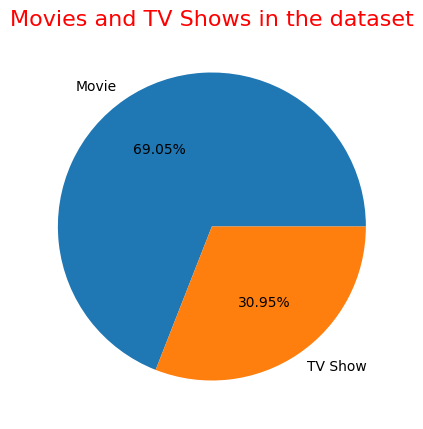

In [19]:
# visualization of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5),dpi=100)
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset',fontsize=16,color='red');

* The dataset contains more movies than TV shows. Specifically, 69.05% of the data pertains to movies, while 30.95% pertains to TV shows.

#### Chart - 2

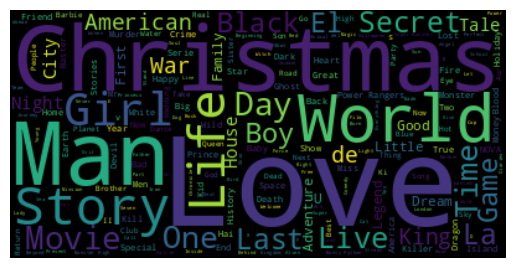

In [22]:
# Title column:  visualization code

# Creating and Displaying a Word Cloud Based on Titles in a Pandas Dataframe
text = " ".join(word for word in df['title'])

# Create the WordCloud object and generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# Display the word cloud using matplotlib.pyplot
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

* The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.  

#### Chart - 3

In [23]:
# Director column:visualization code

# Printing the Number of Directors for Movies and TV Shows Separately

print(f"number of director who  by directed movie : { df[df['type']=='Movie']['director'].value_counts().sum()}")
print(f"number of director who  by directed TV Show : { df[df['type']=='TV Show']['director'].value_counts().sum()}")

number of director who  by directed movie : 5214
number of director who  by directed TV Show : 184


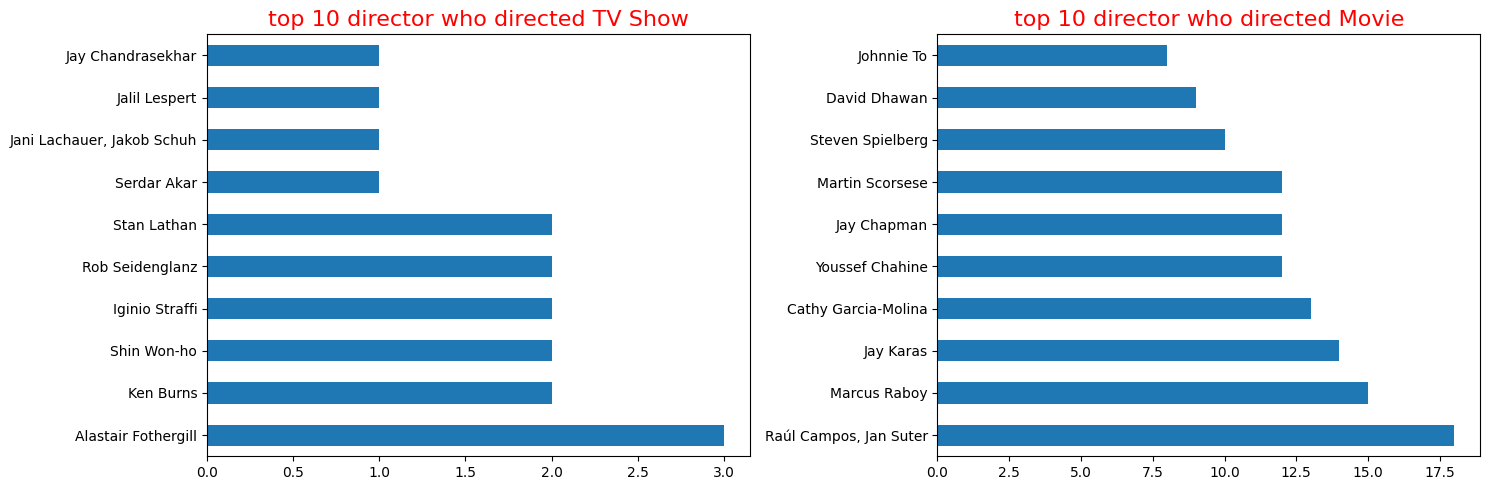

In [24]:
#defining fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=16,color='red')

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=16,color='red')

plt.tight_layout()
plt.show()

* The director Alastair Fothergill has directed three TV shows, which is the highest number of TV shows directed by any director in the dataset.
* Raul Campos and Jan Suter have collaborated directed 18 movies, which is the highest number compared to any other director pair in the dataset. Following them are Marcus Raboy, Jay Karas, and Cathy Garcia-Molina.

#### Chart - 4

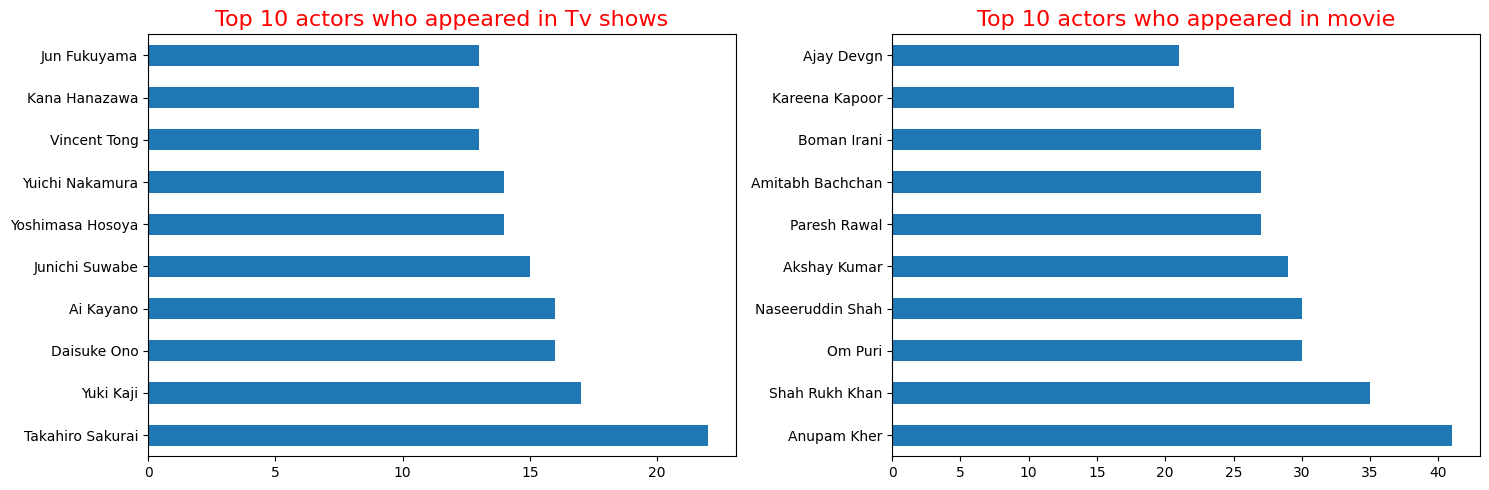

In [25]:
#Cast column: visualization code
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 TV shows actor
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=16,color='red')

# top 10 Movie actor
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=16,color='red')

plt.tight_layout()
plt.show()

* Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
* Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.

#### Chart - 5

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

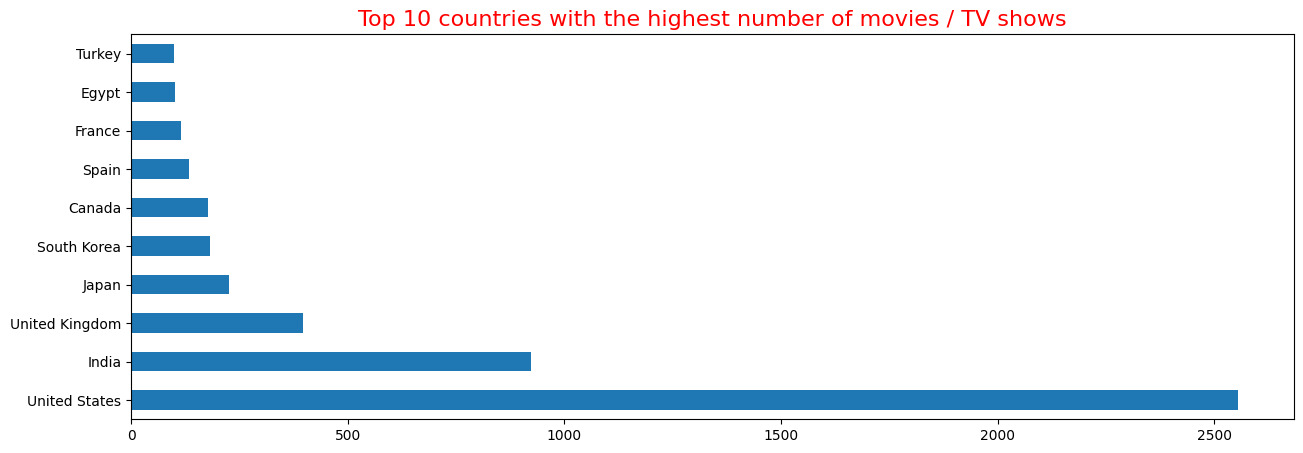

In [26]:
# Chart - 5 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(15,5),dpi=100)
df.country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies / TV shows',fontsize=16,color='red')

* The highest number of movies / TV shows were based out of the US, followed by India and UK.

#### Chart - 6

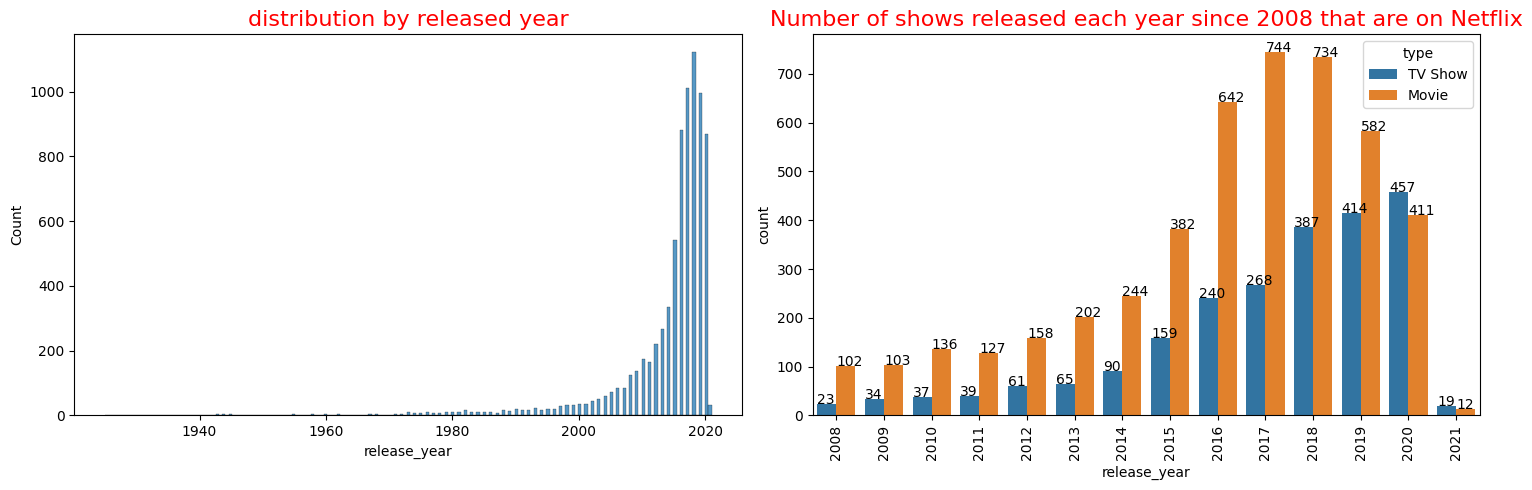

In [27]:
# Release_Year column: visualization code

fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('distribution by released year',fontsize=16,color='red')

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=range(2008,2022), ax=ax[1])
count.set_title('Number of shows released each year since 2008 that are on Netflix',fontsize=16,color='red')
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Netflix has more new movies and TV shows than old ones.
* The company has a consistent focus on adding new shows to its platform.
* In 2020, there was a decrease in the number of movies added, but not in the number of TV shows added. This could indicate a shift towards introducing more TV series rather than movies on Netflix.

#### Chart - 7

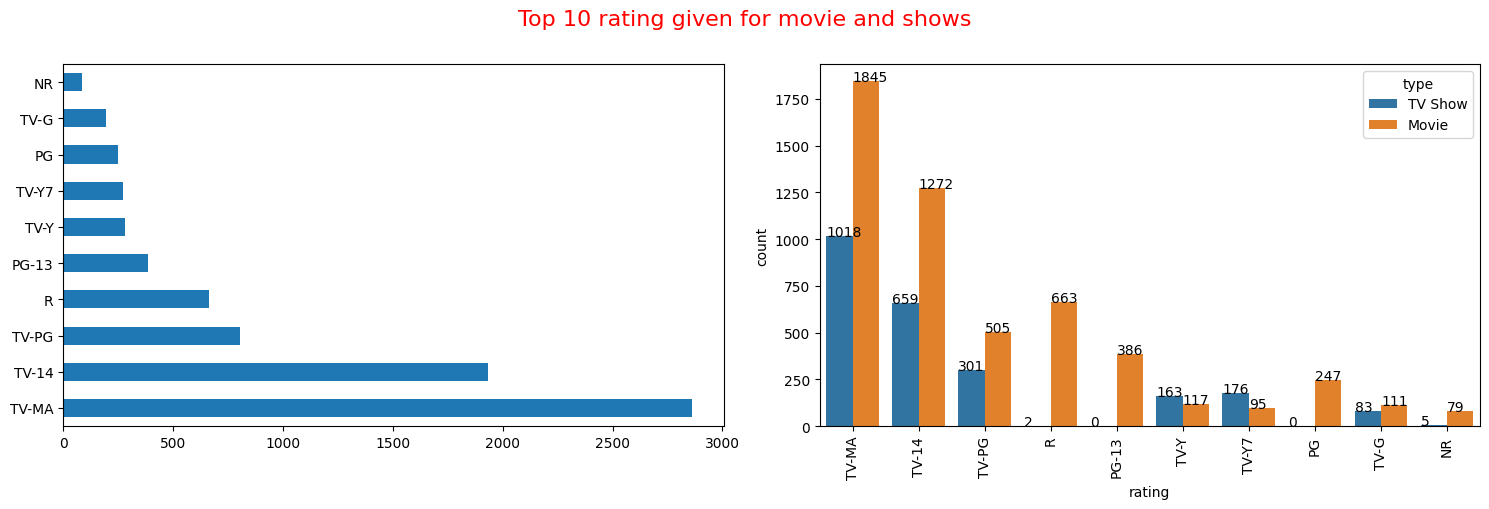

In [28]:
# Rating column: visualization code
# Top 10 Rating
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)
plt.suptitle('Top 10 rating given for movie and shows', size=16,color='red', y=1.01)

# univariate analysis
df['rating'].value_counts()[:10].plot(kind='barh',ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

#### Chart - 8

In [29]:
# Duration column: visualization code
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [34]:
# Creating different dataset from duration

netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

Text(0.5, 0, 'Year')

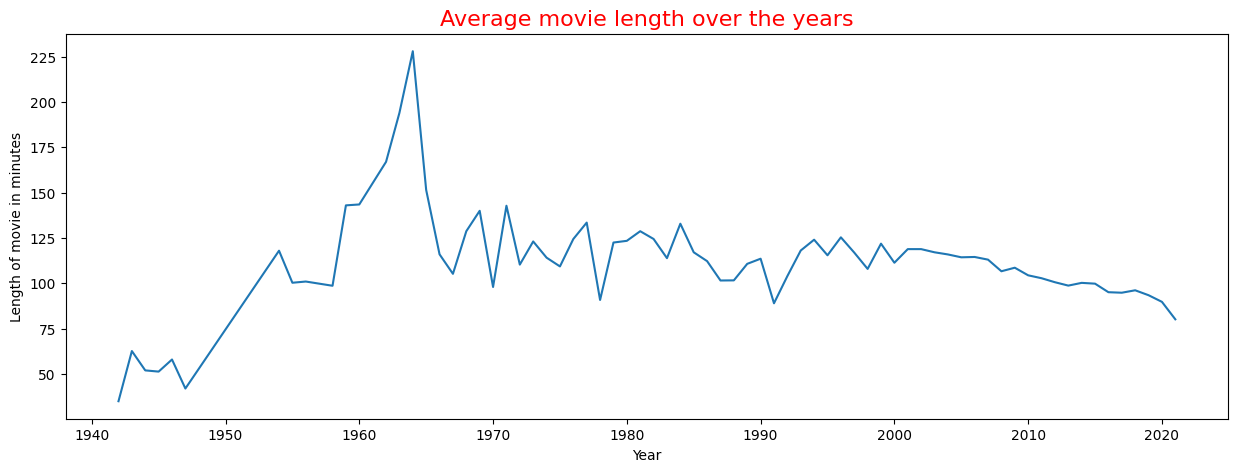

In [35]:
# Netflix Movie Duration
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

# Average movie length over the years
plt.figure(figsize=(15,5),dpi=100)
netflix_movies.groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years',fontsize=16,color='red')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

* Netflix offers a range of movies on its platform, including those from as far back as 1942.
* Movies made in the 1940s had a relatively short duration, according to their plots.
* On average, movies made in the 1960s are the longest in length.
* The average length of movies has been decreasing steadily since the 2000s.

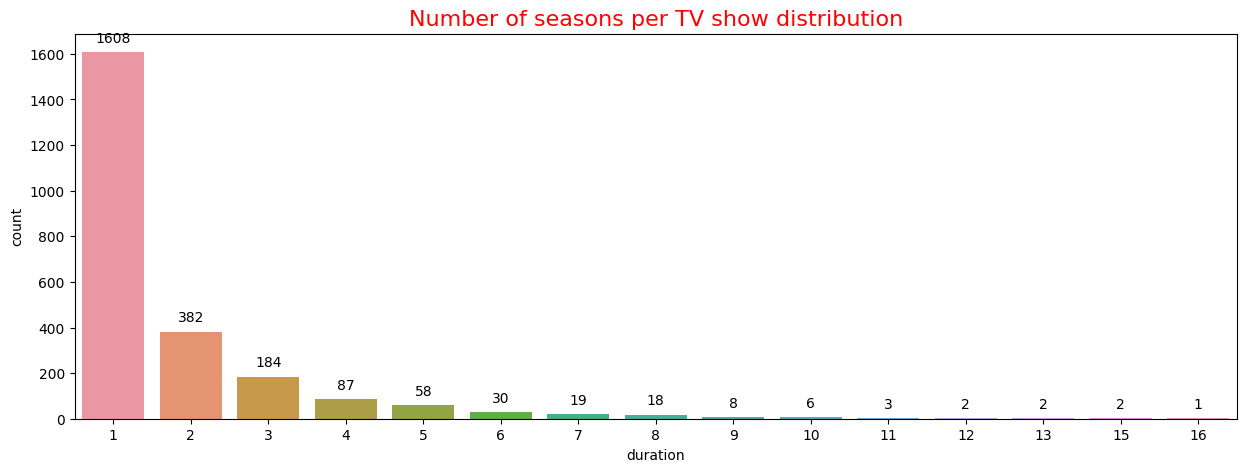

In [36]:
# TV show duration
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

# Seasons in each TV show
plt.figure(figsize=(15,5),dpi=100)
p = sns.countplot(x='duration',data=netflix_shows)
plt.title('Number of seasons per TV show distribution',fontsize=16,color='red')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* The TV series in the dataset have a maximum of 16 seasons, but the majority only have one season.
* This could suggest that many of the TV shows are relatively new and additional seasons may be in the works.
* There are very few TV shows in the dataset with more than 8 seasons.

#### Chart - 9

Text(0.5, 1.0, 'Top 10 genres')

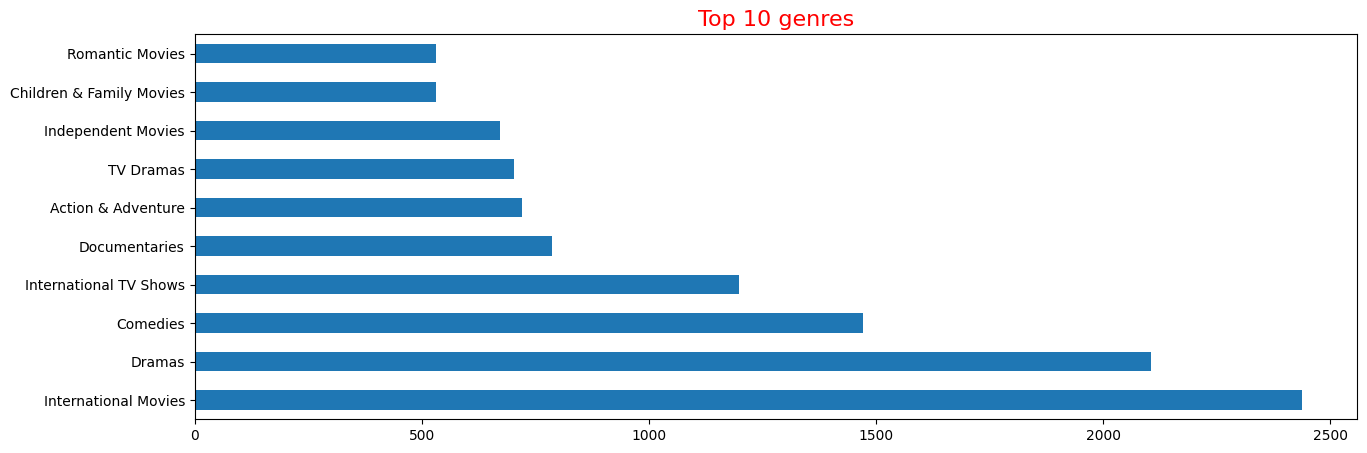

In [37]:
# Chart - 9 visualization code

# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
plt.figure(figsize=(15,5),dpi=100)
genres = genres.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 genres',fontsize=16,color='red')

* The International movie is the most popular genre followed by dramas and comedies.

#### Chart - 10

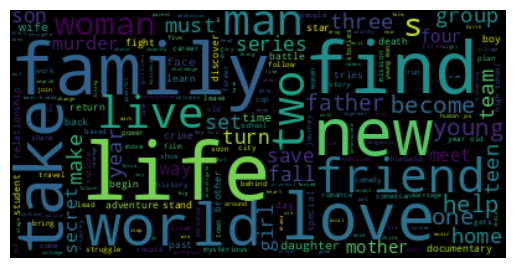

In [38]:
# Description

# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

* Most of the comman words present in description column are family, find, life, love, new, world, friend.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Missing Data %
round(df.isna().mean().sort_values(ascending=False)*100,2)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

* For the missing values in the director, cast, and country attributes, the 'empty string' can be used as a replacement.
* The percentage of null values in the rating and date_added columns is small, and dropping these values may not significantly impact model building.

In [41]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [42]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### 2. Handling Outliers

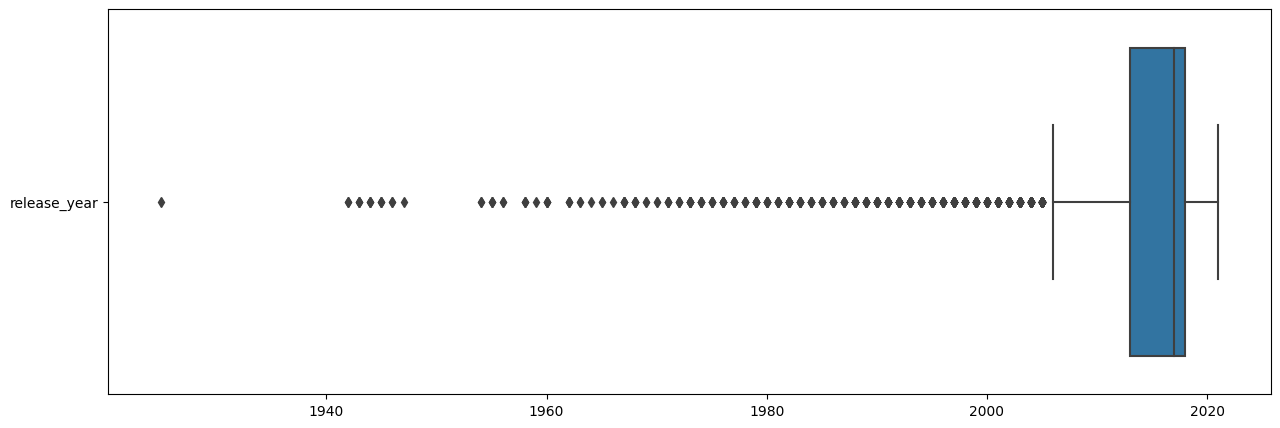

In [43]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,orient='h');

* Outlier handling may not be necessary for textual data as outliers are typically defined in numerical data.
* Data cleaning and preprocessing steps are still necessary to ensure the data is ready for model building.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***